In [1]:
import pandas as pd                                         # loading and cleaning the dataset
import numpy as np                                          # manipulating it

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 

import tensorflow as tf
from tensorflow import keras

####################################### Preparing data

path="C:/Users/vanes/OneDrive - Universitat de Barcelona/8e semestre/ML-EELS/"

ds = path + '/Mn_Fe_dataset.pkl'
lb = path + '/Mn_Fe_labels.pkl'

X = pd.read_pickle(ds)
y = pd.read_pickle(lb)

#X = X.to_numpy()
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

####################################### Defining the model

model = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)),
    keras.layers.MaxPooling1D(pool_size=2, strides=2),

    keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2, strides=2),

    keras.layers.Flatten(),            
    keras.layers.Dense(1200, activation='relu'),      
    keras.layers.Dense(5, activation='softmax')
])

model.summary()     

# the last layer need to be 2, affiliation yes (1) or not (0), but with softmax we get their probabilities

model.compile(optimizer=tf.keras.optimizers.Adam(), # optimizer='adam'
              loss='sparse_categorical_crossentropy',   
              metrics=['accuracy'])

######################################## Training and evaluating the mdeo

model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=10) 
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
# print('\nTest accuracy:', test_acc) 

######################################## Making predictions

pred_prob = model.predict(X_test)
predictions = []

for i in range (0,len(pred_prob)):
    predictions.append(np.argmax(pred_prob[i]))

######################################## Accuracy

print('Accuracy', accuracy_score(y_test, predictions))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 698, 32)           128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 349, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 347, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 173, 64)          0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 11072)             0         
                                                                 
 dense (Dense)               (None, 1200)              1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1660
           1       1.00      0.99      1.00       671
           2       0.99      1.00      0.99       347
           3       0.96      0.98      0.97       305
           4       1.00      0.97      0.98       448

    accuracy                           0.99      3431
   macro avg       0.99      0.99      0.99      3431
weighted avg       0.99      0.99      0.99      3431



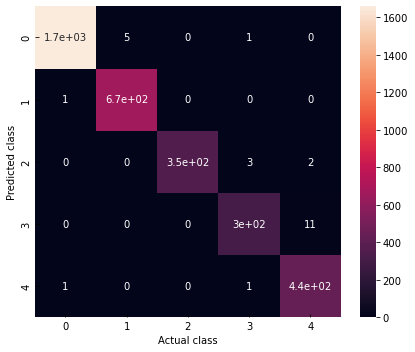

In [8]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, predictions))


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
%matplotlib inline

# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

cm = confusion_matrix(predictions, y_test)

fig, ax = plt.subplots(1,1,figsize=(6,5))
sns.heatmap(cm, annot = True)
plt.tick_params(axis='x', direction='in')
plt.tick_params(axis='y', direction='in')
plt.ylabel('Predicted class')
plt.xlabel('Actual class')
plt.tight_layout()